# 데이터셋 : 전복 데이터 [UCI  ML : Abalone](http://archive.ics.uci.edu/ml/datasets/Abalone)

- File size : 4177  
- 7:3 비율로 train/test (random_state = 20201005)  
- train set -> 모델 -> 예측(rings) -> rmsle -> 점수 출력  
- random forest regressor 이용

# 파일 읽어오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
filepath = 'D:/downloads/'
abalone = pd.read_csv(filepath+'abalone.txt',
                   header=None,
                   names=['sex','length','diameter','height','whole weight','shcuked weight','viscera weight','shell weight','rings'])
abalone.head(1)

,sex,length,diameter,height,whole weight,shcuked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15


# 각 특성 왜도 조사 : 딱히 log , sqrt 할만한 특성은 X

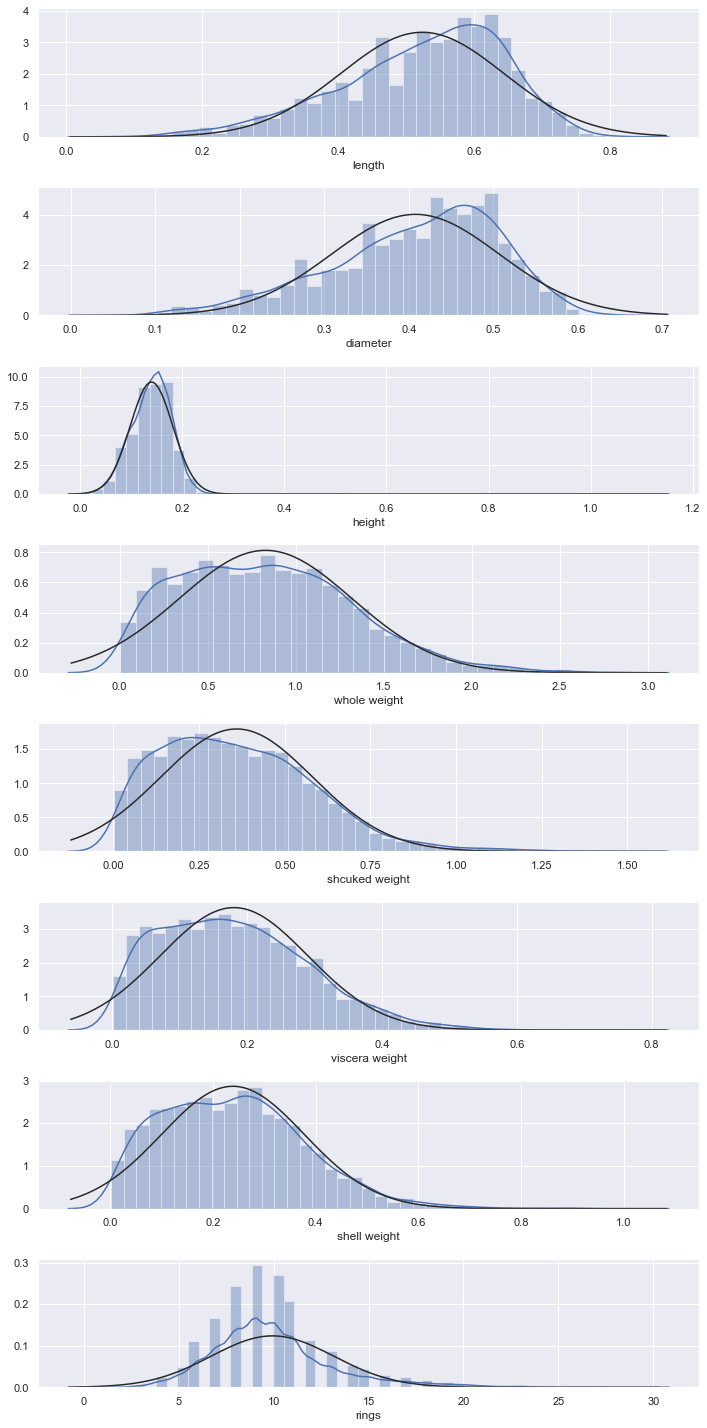

In [3]:
from scipy.stats import norm
L = abalone.shape[1]-1
plt.figure(figsize=(10,20))
for i in range(L):
    col = abalone.columns[i+1]
    plt.subplot(L,1,i+1)
    sns.distplot(abalone[col],kde=True,fit=norm)
plt.tight_layout()

# 표준화 or 정규화 (수치형)

In [4]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler , Normalizer

numeric_cols = abalone.columns.drop(['sex','rings'])
for col in numeric_cols:
    abalone[col] = StandardScaler().fit_transform(abalone[col].values.reshape(-1,1))

In [5]:
abalone.describe()

,length,diameter,height,whole weight,shcuked weight,viscera weight,shell weight,rings
count,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4177.000000
mean,-6.651770e-16,-3.957146e-16,5.082520e-16,1.206706e-16,-1.180127e-17,-1.817502e-16,3.750890e-16,9.933684
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,3.224169
min,-3.739154e+00,-3.556267e+00,-3.335953e+00,-1.686092e+00,-1.614731e+00,-1.643173e+00,-1.705134e+00,1.000000
25%,-6.161975e-01,-5.833158e-01,-5.862075e-01,-7.897577e-01,-7.811585e-01,-7.946415e-01,-7.819095e-01,8.000000
50%,1.749513e-01,1.725193e-01,1.156329e-02,-5.963767e-02,-1.052891e-01,-8.753202e-02,-3.470794e-02,9.000000
75%,7.579031e-01,7.267984e-01,6.093341e-01,6.613049e-01,6.426730e-01,6.606355e-01,6.478319e-01,11.000000
max,2.423480e+00,2.440025e+00,2.368329e+01,4.072271e+00,5.085388e+00,5.286500e+00,5.504642e+00,29.000000


상관계수가 비슷비슷하게 좋음

In [6]:
abalone.drop(['sex'],axis=1).corr()['rings'].sort_values(ascending=False)

rings             1.000000
shell weight      0.627574
diameter          0.574660
height            0.557467
length            0.556720
whole weight      0.540390
viscera weight    0.503819
shcuked weight    0.420884
Name: rings, dtype: float64

# 이진인코딩 (범주형)
※ 모든 컬럼이 아니라 마지막 컬럼을 빼고 추가해야함.(특성끼리 종속 관계를 없애야함)  
ex ) 'A','B','C' 항목을 가지는 범주 변수 --> 0 , 1 , 0 처럼 생긴 3 컬럼은 앞에 2개를 보면 나머지 컬럼은 자동으로 알 수 있음.

In [7]:
ohe = pd.get_dummies(abalone['sex'],prefix='sex')
abalone = abalone.join(ohe[ohe.columns[:-1]])
abalone = abalone.drop(['sex'],axis=1)
abalone

,length,diameter,height,whole weight,shcuked weight,viscera weight,shell weight,rings,sex_F,sex_I
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,15,0,0
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,7,0,0
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,9,1,0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,10,0,0
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,7,0,1
...,...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,11,1,0
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,10,0,0
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,9,0,0
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,10,1,0


# 데이터 분할

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(abalone.drop(['rings'],axis=1),
                                             abalone['rings'],
                                             test_size=0.3,
                                             random_state=20201005)

In [9]:
def rmsle(y,y_pred):
    logged = np.log1p(y)-np.log1p(y_pred)
    mean_squared = np.square(logged).mean()
    return np.sqrt(mean_squared)

# 학습 , 예측 , 평가

In [10]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500,
                              random_state=42,
                              max_features=abalone.shape[1]//2)
model.fit(xtrain,ytrain)
ypred= model.predict(xtest)
print(f'score : {rmsle(ytest,ypred)}')

score : 0.1681561365928321
